In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
print(lr.coef_)

[ -0.1850394  -10.74378586  23.97110665  15.4460079  -33.6348803
  19.07653925   3.87696491  10.51802947  34.1537076    1.91366485]


In [7]:
lr_score = lr.score(X_test, y_test)
lr_score

0.5341988244945843

In [8]:
lr_pred = lr.predict(X_test)
pd.DataFrame(data = np.array([y_test, lr_pred, abs(y_test - lr_pred)]).T, columns=["Thực tế", "Dự đoán", "Lệch"])

,Thực tế,Dự đoán,Lệch
0,200.0,148.094585,51.905415
1,202.0,208.214487,6.214487
2,67.0,186.401355,119.401355
3,80.0,82.489652,2.489652
4,151.0,163.396531,12.396531
...,...,...,...
84,276.0,155.358278,120.641722
85,150.0,151.408247,1.408247
86,124.0,140.080252,16.080252
87,114.0,89.430117,24.569883


In [9]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [10]:
print(ridge.coef_)

[ -0.17638084 -10.73032466  23.98266189  15.43569937 -32.68637791
  18.33661929   3.43765852  10.38456799  33.76606766   1.9219799 ]


In [11]:
ridge_score = ridge.score(X_test, y_test)
ridge_score

0.5340989183772482

In [12]:
def rmse(yt, yp):
    return np.sqrt(mean_squared_error(yt, yp))

In [24]:
_lambda = [0, 0.0001,0.01, 0.04, 0.05, 0.06, 0.1, 0.5, 1, 5, 10, 20]
value_rmse = []
for i in _lambda:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_rmse = rmse(y_test, ridge_pred)
    value_rmse.append(ridge_rmse)
    print("Lambda =", i, ", RMSE =", ridge_rmse)


Lambda = 0 , RMSE = 53.96120723370796
Lambda = 0.0001 , RMSE = 53.961213041501075
Lambda = 0.01 , RMSE = 53.96178783070732
Lambda = 0.04 , RMSE = 53.96352725447065
Lambda = 0.05 , RMSE = 53.96410620968377
Lambda = 0.06 , RMSE = 53.96468470796124
Lambda = 0.1 , RMSE = 53.966993785937206
Lambda = 0.5 , RMSE = 53.98948171081372
Lambda = 1 , RMSE = 54.0155714466232
Lambda = 5 , RMSE = 54.15564856819796
Lambda = 10 , RMSE = 54.25552623152871
Lambda = 20 , RMSE = 54.39873919585274


,values
count,89.000000
mean,149.022472
std,79.512431
min,31.000000
25%,75.000000
50%,142.000000
75%,214.000000
max,308.000000


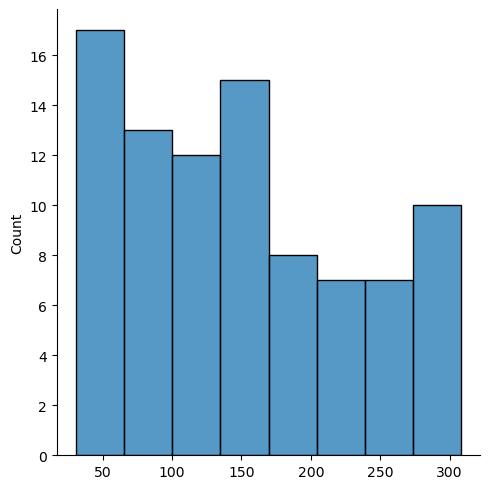

In [25]:
import seaborn as sns
sns.displot(y_test)
pd.DataFrame(data = y_test, columns = ["values"]).describe()

,values
count,89.000000
mean,149.628629
std,56.346371
min,49.719268
25%,107.633957
50%,148.094585
75%,185.792001
max,289.994179


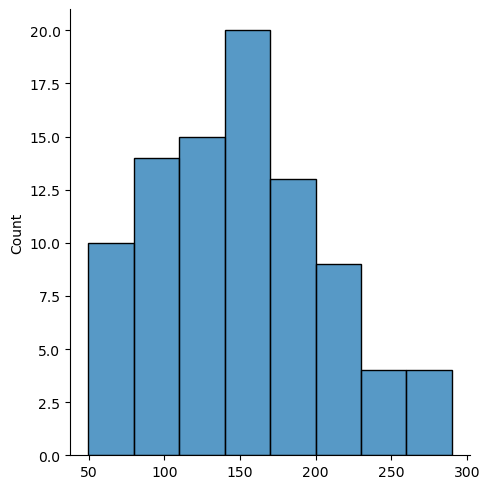

In [27]:
sns.displot(lr_pred)
pd.DataFrame(data = lr_pred, columns = ["values"]).describe()

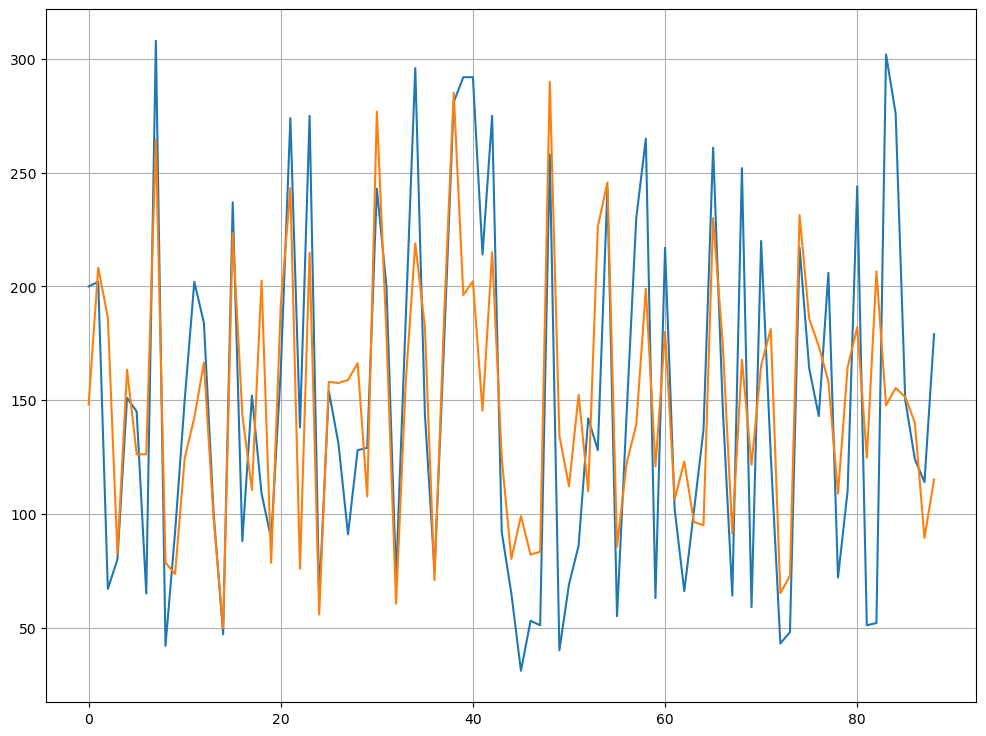

In [36]:
plt.figure(figsize = (12, 9))
plt.plot(y_test)
plt.plot(lr_pred)
plt.grid()
plt.show()